In [117]:
import pandas as pd
import numpy as np
import olac.data_generators as dg
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
data = dg.cluster_generator()

df = pd.DataFrame(list(data), columns={'x', 'y', 'label'})

In [33]:
investigate = np.random.binomial(1, 0.1 ,  size=len(df))

In [38]:
# select the all the records we want to investigate
df_invest = df[investigate == 1].copy()

In [272]:
def cost_investigation(data_point, predicted_label, salary=-1.0, fraud_label=1):
    correct_investigation = np.random.uniform(0,1)
    correct_label = data_point[-1]
    if (correct_label == predicted_label) & (correct_label == fraud_label):
        # we have found fraud correctly
        # we are on the right way to get our investigation back
        profit = 2
        loss = 0
    elif (correct_label == predicted_label) & (correct_label != fraud_label):
        # we did not find fraud in a case where we did not expect fraud
        # so we will qualify this as breaking even
        profit = 1
        loss = 0
    elif (correct_label != predicted_label) & (correct_label == fraud_label):
        # we found fraud where the algorithm actually predicted no fraud
        # hmm strange, it is good that we investigated it!!
        profit = 2
        loss = 0
    elif (correct_label != predicted_label) & (correct_label != fraud_label):
        # we have predicted fraud but it was not fraud at all 
        # hmm we are on the wrong path
        profit = 0
        loss = -1
    cost = salary + profit + loss
    return cost

In [277]:
def cost_of_label(data, decision, classification, data_type='point'):
    """
    This function gives back the cost of obtaining a label from the incoming data. It will check if the classification
    of the points one wants to investigate is correct and assesses a profit or loss on each result.
    
    a data point has the format [x,y,label] where label is always the last entry in the list

    Parameters
    ----------
    data : can be either a data point or a array of data points.
    decision : bool or array, investigate a point True or False
    classification : label of data point given by model.

    Returns
    -------
    costs for obtaining a certain label of a data point or labels of an array of data points

    """
    if data_type == 'point':
        if decision == 1:
            # for pointlike input
            cost = cost_investigation(data, classification)
            return cost
        else:
            return 0.0

    elif data_type == 'array':
        # array like data input
        df = pd.DataFrame(list(data), columns={'x', 'y', 'label'})
        df['pred_label'] = classification
        df_invest = df[decision == 1].copy()
        df['cost'] = df_invest.apply(lambda x: cost_investigation(x[['x', 'y', 'label']], x['pred_label']), axis=1)
        df.fillna(0,inplace=True)

        return np.array(df['cost'])
    
    
    
    
    
    

In [278]:
cost=[]
for i in range(0,500):
    data = dg.cluster_generator()

    decission = np.random.binomial(1,0.1, size=1001)
    classification = np.random.binomial(1,0.5, size=1001)
    cost.append(cost_of_label(data, decission, classification, data_type='array').sum())

(array([ 1.,  2.,  8., 13., 16., 28., 22., 51., 43., 43., 36., 50., 51.,
        44., 30., 34., 14.,  9.,  3.,  2.]),
 array([-136. , -123.1, -110.2,  -97.3,  -84.4,  -71.5,  -58.6,  -45.7,
         -32.8,  -19.9,   -7. ,    5.9,   18.8,   31.7,   44.6,   57.5,
          70.4,   83.3,   96.2,  109.1,  122. ]),
 <a list of 20 Patch objects>)

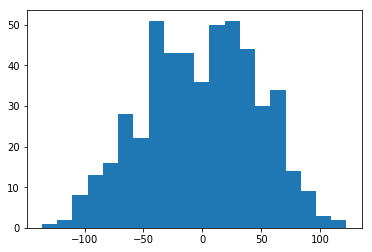

In [279]:
plt.hist(cost, bins=20)

In [276]:
data = dg.cluster_generator()

for i in data:
    decision = np.random.binomial(1,0.5)
    classification = np.random.binomial(1,0.5)
    print(cost_investigation(i, classification))
    
    

1.0
1.0
0.0
1.0
1.0
1.0
-2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-2.0
-2.0
1.0
-2.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
-2.0
1.0
1.0
1.0
1.0
0.0
1.0
-2.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
-2.0
-2.0
-2.0
-2.0
1.0
1.0
1.0
0.0
-2.0
1.0
1.0
-2.0
0.0
0.0
0.0
0.0
-2.0
1.0
1.0
0.0
-2.0
0.0
1.0
0.0
-2.0
1.0
1.0
0.0
1.0
0.0
0.0
-2.0
0.0
0.0
1.0
1.0
1.0
-2.0
0.0
1.0
1.0
0.0
1.0
1.0
-2.0
-2.0
0.0
0.0
1.0
1.0
-2.0
0.0
0.0
1.0
-2.0
-2.0
-2.0
0.0
-2.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
-2.0
0.0
0.0
1.0
1.0
1.0
1.0
-2.0
-2.0
-2.0
0.0
0.0
-2.0
-2.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
-2.0
0.0
0.0
-2.0
-2.0
1.0
0.0
0.0
0.0
-2.0
1.0
1.0
-2.0
1.0
0.0
-2.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
-2.0
1.0
0.0
-2.0
-2.0
-2.0
1.0
-2.0
0.0
0.0
-2.0
0.0
-2.0
0.0
-2.0
0.0
-2.0
1.0
1.0
-2.0
1.0
-2.0
0.0
-2.0
0.0
-2.0
1.0
0.0
0.0
-2.0
0.0
1.0
0.0
-2.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
-2.0
0.0
1.0
-2.0
0.0